In [1]:
import pandas as pd

df = pd.read_csv('../data/dataset-1.csv')

C:\Users\Shahin\AppData\Local\Temp\ipykernel_18780\332694122.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [3]:
df.sample(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
10712,190,marketing,NaN,0.990741,3,NaN,medium,0.939157,Employed,3.0
4136,146,support,NaN,0.484583,2,NaN,low,0.471085,Left,3.0
13627,237,sales,NaN,0.848149,4,NaN,low,1.000000,Employed,4.0
10857,275,engineering,NaN,0.644604,3,NaN,low,0.716976,Employed,3.0
3477,215,support,NaN,0.859181,3,NaN,medium,0.662776,Employed,3.0


In [4]:
df.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure'],
      dtype='object')

In [5]:
df.shape

(14249, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [8]:
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [9]:
df['department'].unique()

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'temp', 'procurement', 'finance', nan, 'management',
       'information_technology', 'admin'], dtype=object)

In [10]:
# Filter the DataFrame to exclude rows with 'temp' in the 'department' column
df = df[df['department'] != 'temp']

In [11]:
df['department'].unique()

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'procurement', 'finance', nan, 'management',
       'information_technology', 'admin'], dtype=object)

In [12]:
# Replace 'information_technology' with 'IT' in the 'department' column
df['department'] = df['department'].replace('information_technology', 'IT')

In [13]:
df['department'].unique()

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'procurement', 'finance', nan, 'management', 'admin'], dtype=object)

In [14]:
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12043
last_evaluation       1351
n_projects               0
recently_promoted    13768
salary                   0
satisfaction             0
status                   0
tenure                   0
dtype: int64

In [15]:
# Remove rows with missing 'last_evaluation' values
df = df.dropna(subset=['last_evaluation'])

In [16]:
df.isnull().sum()

avg_monthly_hrs          0
department             642
filed_complaint      10908
last_evaluation          0
n_projects               0
recently_promoted    12449
salary                   0
satisfaction             0
status                   0
tenure                   0
dtype: int64

In [17]:
df['recently_promoted'].unique()

array([nan,  1.])

In [18]:
# Convert numeric values to strings
df['recently_promoted'] = df['recently_promoted'].map({1: 'Yes'})
df['recently_promoted'] = df['recently_promoted'].fillna('Missing')

In [19]:
df.isnull().sum()

avg_monthly_hrs          0
department             642
filed_complaint      10908
last_evaluation          0
n_projects               0
recently_promoted        0
salary                   0
satisfaction             0
status                   0
tenure                   0
dtype: int64

In [20]:
df['filed_complaint'].unique()

array([nan,  1.])

In [21]:
# Convert numeric values to strings
df['filed_complaint'] = df['filed_complaint'].map({1: 'Yes'})
df['filed_complaint'] = df['filed_complaint'].fillna('Missing')

In [22]:
df.isnull().sum()

avg_monthly_hrs        0
department           642
filed_complaint        0
last_evaluation        0
n_projects             0
recently_promoted      0
salary                 0
satisfaction           0
status                 0
tenure                 0
dtype: int64

In [23]:
df['department'] = df['department'].fillna('Missing')

In [24]:
df.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
dtype: int64

In [25]:
df.sample(20)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
2763,255,finance,Yes,0.805909,2,Missing,medium,0.745534,Employed,2.0
2314,308,Missing,Missing,0.925630,7,Missing,medium,0.095146,Left,5.0
13535,254,engineering,Missing,0.832654,6,Missing,medium,0.131069,Left,4.0
6337,128,support,Missing,0.351851,4,Missing,low,0.455254,Employed,2.0
10343,172,sales,Missing,0.717587,2,Missing,low,0.432212,Employed,2.0
8198,258,finance,Missing,0.986695,4,Missing,low,0.895140,Left,5.0
10887,200,admin,Missing,0.877391,3,Missing,medium,0.671822,Employed,2.0
1160,254,sales,Missing,1.000000,5,Missing,low,0.794377,Left,5.0
14156,201,sales,Missing,0.755927,4,Missing,low,0.495625,Employed,2.0
11028,222,management,Yes,1.000000,3,Yes,low,0.540140,Employed,3.0


In [26]:
df.shape

(12717, 10)

In [27]:
df.duplicated().any()

False

<Axes: xlabel='status'>

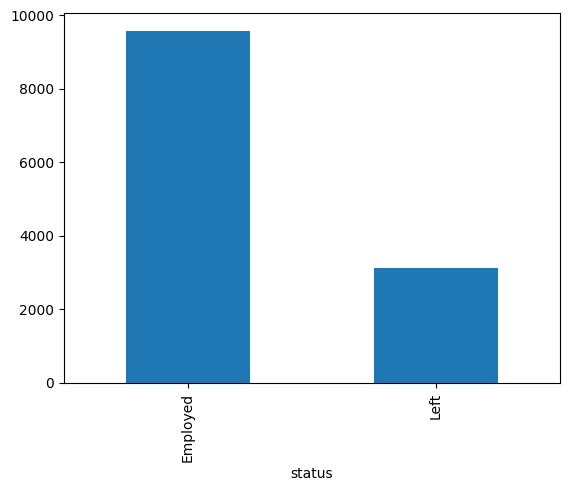

In [28]:
df['status'].value_counts().plot(kind='bar')

In [29]:
df['status'] = df['status'].map({'Employed': 0, 'Left': 1})

In [30]:
df['status']

0        1
2        0
3        0
4        0
5        0
        ..
14244    0
14245    0
14246    1
14247    0
14248    0
Name: status, Length: 12717, dtype: int64

In [31]:
X = df.drop(columns=['status'])

In [32]:
X

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure
0,221,engineering,Missing,0.932868,4,Missing,low,0.829896,5.0
2,184,sales,Missing,0.788830,3,Missing,medium,0.834988,3.0
3,206,sales,Missing,0.575688,4,Missing,low,0.424764,2.0
4,249,sales,Missing,0.845217,3,Missing,low,0.779043,3.0
5,140,sales,Missing,0.589097,4,Missing,medium,0.660020,4.0
...,...,...,...,...,...,...,...,...,...
14244,178,IT,Missing,0.735865,5,Missing,low,0.263282,5.0
14245,257,sales,Missing,0.638604,3,Missing,low,0.868209,2.0
14246,232,finance,Yes,0.847623,5,Missing,medium,0.898917,5.0
14247,130,IT,Missing,0.757184,4,Missing,medium,0.641304,3.0


In [33]:
y = df['status']

In [34]:
y

0        1
2        0
3        0
4        0
5        0
        ..
14244    0
14245    0
14246    1
14247    0
14248    0
Name: status, Length: 12717, dtype: int64

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Define the numerical columns and their corresponding data types
numerical_cols = ['satisfaction', 'last_evaluation', 'n_projects', 'avg_monthly_hrs', 'tenure']

# Define the categorical columns and their corresponding data types
categorical_cols = ['department', 'filed_complaint', 'recently_promoted']

# Create lists for transformers based on data types
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()
ordinal_transformer = OrdinalEncoder()

# Define the column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('nominal', categorical_transformer, categorical_cols),
    ('ordinal', ordinal_transformer, ['salary'])
], remainder='passthrough')

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

Classifier: Logistic Regression


Accuracy: 0.7637578616352201
Precision: 0.5396341463414634
Recall: 0.2822966507177033
F1-Score: 0.3706806282722513
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      1917
           1       0.54      0.28      0.37       627

    accuracy                           0.76      2544
   macro avg       0.67      0.60      0.61      2544
weighted avg       0.73      0.76      0.74      2544



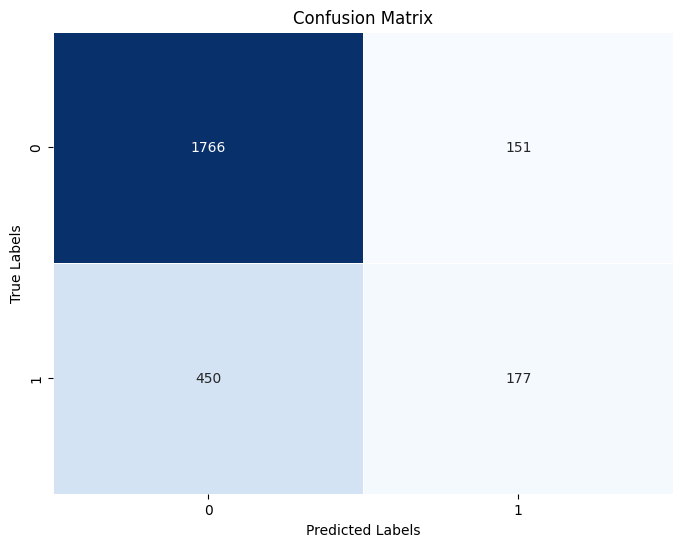



AUC-ROC Score: 0.802982464460102




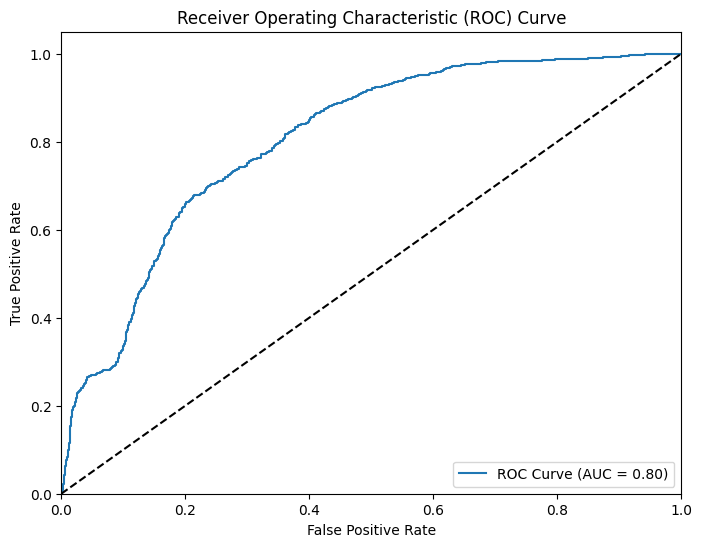



Classifier: Decision Tree


Accuracy: 0.9650157232704403
Precision: 0.926984126984127
Recall: 0.9314194577352473
F1-Score: 0.9291964996022275
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1917
           1       0.93      0.93      0.93       627

    accuracy                           0.97      2544
   macro avg       0.95      0.95      0.95      2544
weighted avg       0.97      0.97      0.97      2544



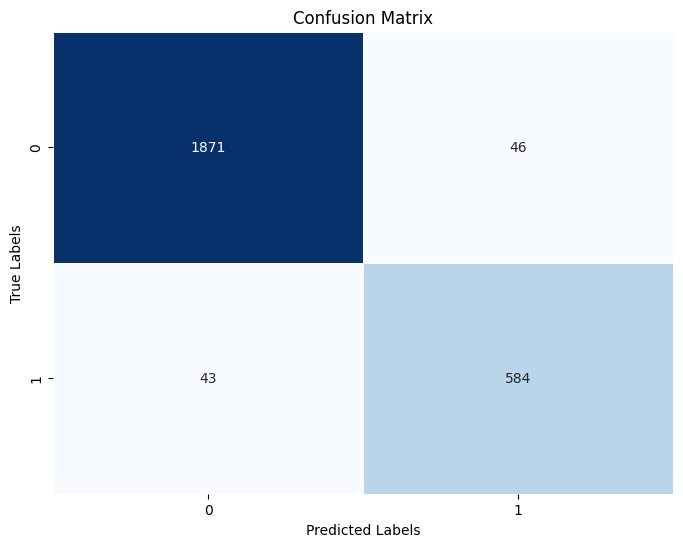



AUC-ROC Score: 0.9537118154612595




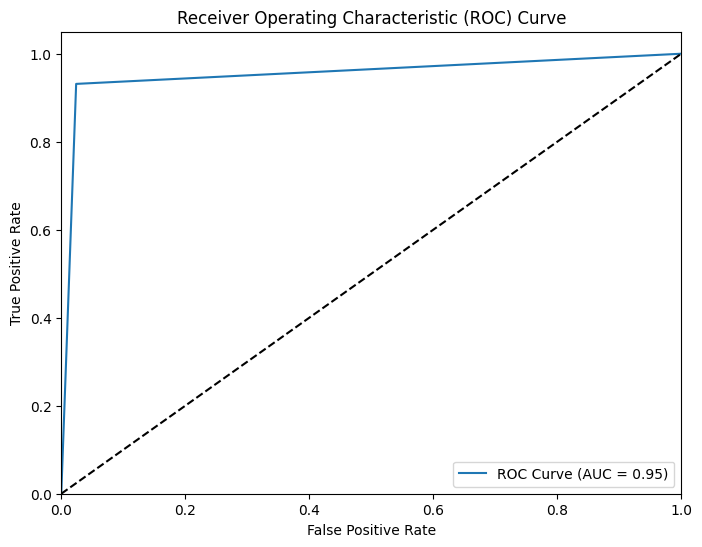



Classifier: XGBoost


Accuracy: 0.9752358490566038
Precision: 0.97
Recall: 0.9282296650717703
F1-Score: 0.9486552567237164
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1917
           1       0.97      0.93      0.95       627

    accuracy                           0.98      2544
   macro avg       0.97      0.96      0.97      2544
weighted avg       0.98      0.98      0.98      2544



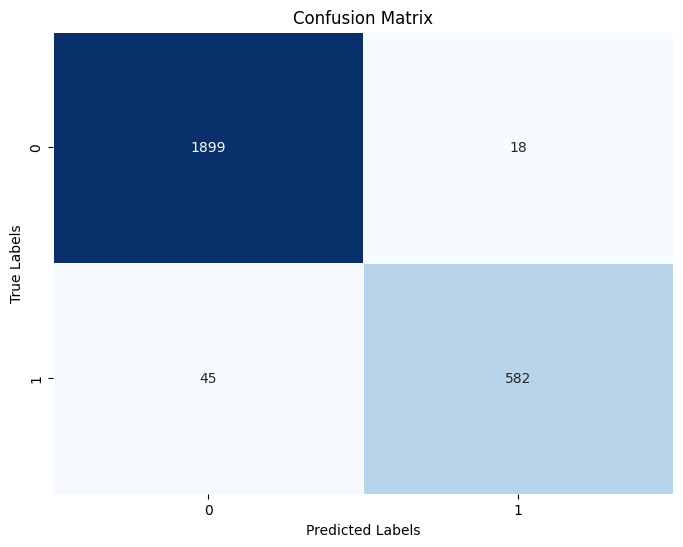



AUC-ROC Score: 0.9891801633832767




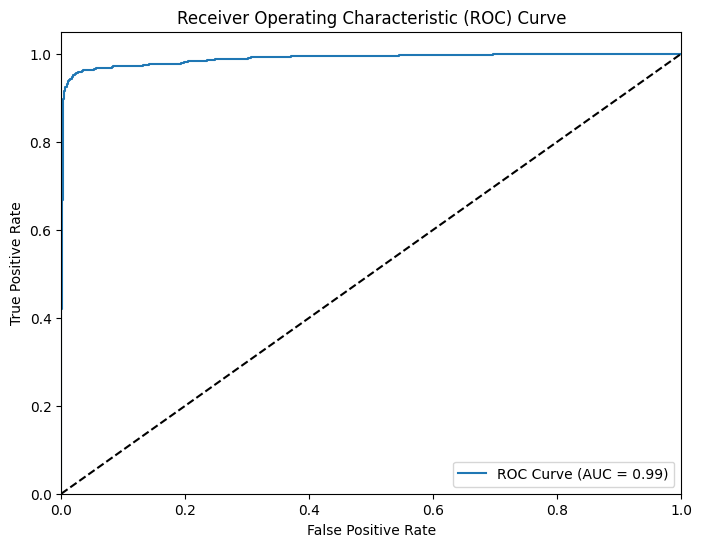



Classifier: Random Forest


Accuracy: 0.976808176100629
Precision: 0.9829931972789115
Recall: 0.9218500797448166
F1-Score: 0.951440329218107
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1917
           1       0.98      0.92      0.95       627

    accuracy                           0.98      2544
   macro avg       0.98      0.96      0.97      2544
weighted avg       0.98      0.98      0.98      2544



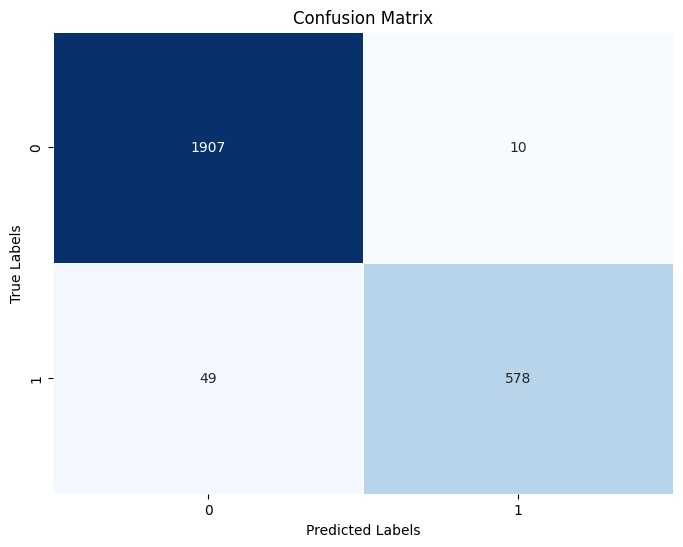



AUC-ROC Score: 0.9924456657839411




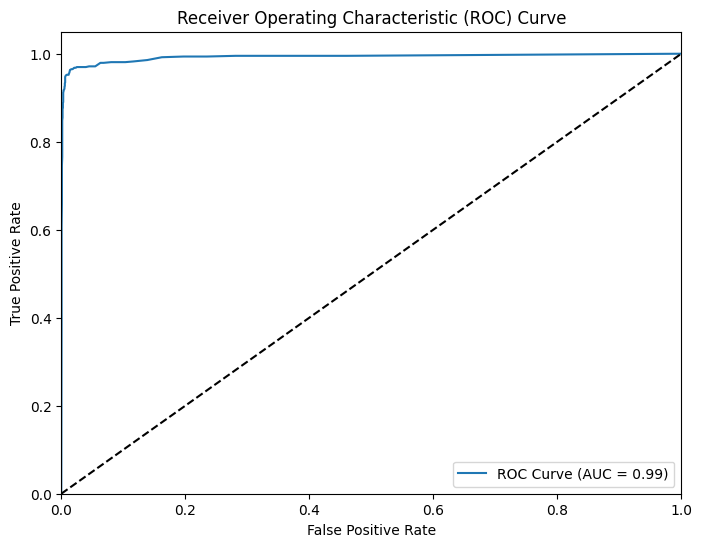

In [38]:
# Define a function for training and evaluating a classifier
def train_evaluate_classifier(classifier, classifier_name):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', classifier)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\033[1mClassifier: {classifier_name}\033[0m")  # Print the classifier name in bold
    print('\n')
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")

    # Display the classification report
    report = classification_report(y_test, y_pred)
    print(report)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Display the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    print('\n')

    # Calculate the AUC-ROC Score
    roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
    print(f"AUC-ROC Score: {roc_auc}")
    print('\n')

    # Plot the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    print('\n')

# List of classifiers to test along with their names
classifiers_to_test = [
    (LogisticRegression(max_iter=1000), "Logistic Regression"),
    (DecisionTreeClassifier(), "Decision Tree"),
    (XGBClassifier(), "XGBoost"),
    (RandomForestClassifier(), "Random Forest")
]

# Loop through the classifiers and evaluate them
for classifier, classifier_name in classifiers_to_test:
    train_evaluate_classifier(classifier, classifier_name)

In [39]:
# Building a pipeline with the champion model - Random Forest Classifier

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=0))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction',
                                                   'last_evaluation',
                                                   'n_projects',
                                                   'avg_monthly_hrs',
                                                   'tenure']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['department',
                                                   'filed_complaint',
                                                   'recently_promoted']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', RandomForestClassifier(random_state=0))])

In [40]:
# Create a DataFrame with the new data for prediction
sample_data = pd.DataFrame({
    'satisfaction': [0.127],             # Corresponds to 'satisfaction' column
    'last_evaluation': [0.834],          # Corresponds to 'last_evaluation' column
    'n_projects': [6],                  # Corresponds to 'n_projects' column
    'avg_monthly_hrs': [283],           # Corresponds to 'avg_monthly_hrs' column
    'tenure': [4],                      # Corresponds to 'tenure' column
    'filed_complaint': ['Yes'],          # Corresponds to 'filed_complaint' column
    'recently_promoted': ['Missing'],        # Corresponds to 'recently_promoted' column
    'department': ['engineering'],            # Use the appropriate department
    'salary': ['low']                   # Use the appropriate salary level
})

# Preprocess and make predictions using your existing pipeline
predicted_label = pipeline.predict(sample_data)

# Display the result
if predicted_label[0] == 1:
    print("An Employee may leave the organization")
else:
    print("An Employee may stay with the organization")


An Employee may leave the organization


In [41]:
import joblib

joblib.dump(pipeline, '../models/dataset-1_model_rf.pkl')

['../models/dataset-1_model_rf.pkl']